# Lecture 19: The seismic cycle III: Slow and deep
## GEO 371T/391: Earthquakes
### Prof. Daniel Trugman, 2021

In [1]:
### Import General Python Packages

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

# Overview

When we talk about "Earthquakes", we usually mean the "fast ones", with slip speeds reach the scale of meters per second, and which radiate significant amounts of seismic radiation. Events of this class typify the "seismogenic" zone, which has the stress, material, frictional, and in-situ properties requisite to produce these fast-slip events. Thinking about earthquake processes more broadly, however, there is a vast managerie of possible event types from very shallow to very deep. The purpose of this notebook is to explore and showcase some of the more "exotic" slip behaviors that occur when we widen our horizons beyond the realm of traditional earthquake science.

First, we'll examine slow slip events in Cascadia from the perspective of a dense permanent GPS network. Then, we'll head south to Parkfield, CA, to take a look at a rich catalog of LFEs compiled for that area. Finally, for homework you head abroad to the subduction zone of your choice, exploring the vast array of slip styles spanning the plate boundary system.

## Example 1: Geodetic Observations of Slow Slip Phenomena

By their very nature, slow slip phenomena are not very amenable to study using conventional techniques in observational seismology. Because of their slow slip speeds, seismic radiation from these events can be weak or non-existant. However, larger slow slip events are readily recorded by geodetic measurements, such as those from GNSS (permanent or campaign), satellite radar, strainmeters, or creepmeters. All of these instruments capture low-frequency, quasistatic deformation transiets that are the hallmark of these events.

One outstanding example comes from the GPS observations of the Cascadia Subduction zones. Dragert et al. (2001) provided some of the first definitive observational evidence for SSEs anywhere in the world. Here, we'll take a closer look at the underlying dataset. The basis for this exercise are processed daily positions available from UNAVCO: https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html 

---

In the original Dragert et al. paper, the study area focused on the deformation field around Vancouver Island. At the time, there were a number of permanent GPS stations distributed along the coastline and continental interior. The number has only grown in recent years.

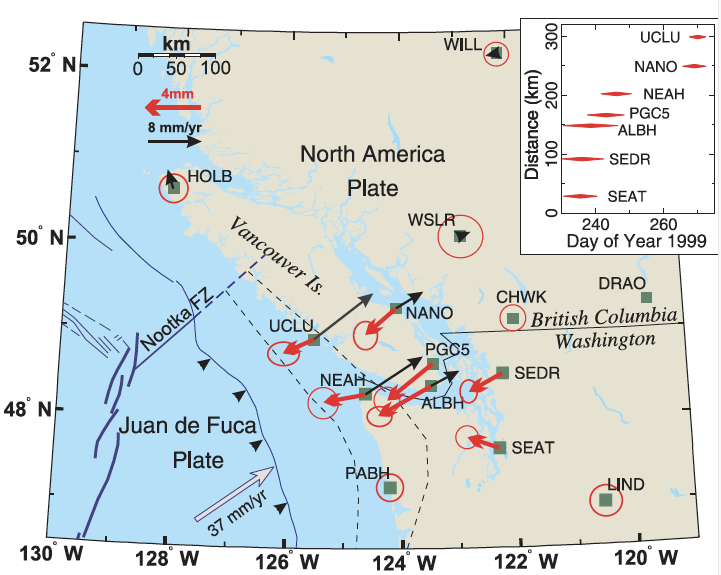

---

Let's take a look at the daily GPS positions for one of the stations near the Coast, ALBH. The UNAVCO input file have 36 header lines followed by data collected at daily increments. Here, the GPS data is processed with a North America reference frame.


In [2]:
### Example loading gps data

# import pandas
import pandas as pd

# setup
nskip = 36 # rows to skip
sta = "ALBH" # station
ref = "final_nam14" # reference

# load data
data = pd.read_csv("data/gps/{:}.pbo.{:}.pos".format(sta,ref),
                  sep="\s+",index_col=None,skiprows=nskip)
print("Columns:",data.columns)
data

Columns: Index(['*YYYYMMDD', 'HHMMSS', 'JJJJJ.JJJJ', 'X', 'Y', 'Z', 'Sx', 'Sy', 'Sz',
       'Rxy', 'Rxz', 'Ryz', 'NLat', 'Elong', 'Height', 'dN', 'dE', 'dU', 'Sn',
       'Se', 'Su', 'Rne', 'Rnu', 'Reu', 'Soln'],
      dtype='object')


,*YYYYMMDD,HHMMSS,JJJJJ.JJJJ,X,Y,Z,Sx,Sy,Sz,Rxy,...,dN,dE,dU,Sn,Se,Su,Rne,Rnu,Reu,Soln
0,19960101,120000,50083.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00207,0.00310,0.00357,0.819,...,-0.06314,-0.09710,-0.00934,0.00128,0.00103,0.00489,-0.012,-0.201,0.116,final
1,19960102,120000,50084.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00240,0.00353,0.00410,0.805,...,-0.06475,-0.09737,-0.00439,0.00156,0.00123,0.00557,-0.000,-0.180,0.093,final
2,19960103,120000,50085.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00251,0.00372,0.00425,0.805,...,-0.06278,-0.10020,-0.00914,0.00165,0.00129,0.00581,-0.013,-0.200,0.102,final
3,19960104,120000,50086.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00192,0.00290,0.00334,0.808,...,-0.06222,-0.09784,-0.00412,0.00122,0.00099,0.00456,-0.026,-0.191,0.126,final
4,19960105,120000,50087.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00181,0.00279,0.00321,0.825,...,-0.06305,-0.09788,-0.00772,0.00112,0.00090,0.00439,-0.048,-0.203,0.152,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8280,20180911,120000,58372.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00254,0.00357,0.00427,0.768,...,0.03626,0.05290,0.02285,0.00175,0.00140,0.00569,-0.010,-0.115,0.024,suppl
8281,20180912,120000,58373.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00219,0.00304,0.00368,0.748,...,0.03790,0.05249,0.01835,0.00153,0.00125,0.00487,-0.002,-0.088,0.027,suppl
8282,20180913,120000,58374.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00231,0.00323,0.00390,0.762,...,0.03833,0.05265,0.01993,0.00160,0.00129,0.00517,0.007,-0.098,0.026,suppl
8283,20180914,120000,58375.5,-2.341333e+06,-3.539050e+06,4.745791e+06,0.00236,0.00327,0.00393,0.760,...,0.03693,0.05282,0.01207,0.00164,0.00132,0.00523,0.023,-0.106,0.020,suppl


---
The header to the file shows lists in detail each of the individual columns. For our purposes, we only need a few. The columns "dN", "dE", "dU" in particular are useful because they track the difference in N, E, and Up components from a reference position (units of meters). We would also like get the actual date in question, rather than a string. We can do this as follows. 

In [3]:
### Reformat dataset

# subset columns
keepcols = ["*YYYYMMDD","HHMMSS","dN","dE","dU"]
data = data[keepcols]

# compute dates
datestr = data["*YYYYMMDD"].astype("str") # day as string
datestr += data["HHMMSS"].astype("str") # time as tring
data["dates"] = pd.to_datetime( # to datetime
    [ss[0:4]+"-"+ss[4:6]+"-"+ss[6:8]+" "+ss[
        8:10]+":"+ss[10:12]+":"+ss[12:14]  for ss in datestr])

# reformat
keepcols = ["dates","dN","dE","dU"]
data = data[keepcols]
data   

<ipython-input-3-76112fb0cf9f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dates"] = pd.to_datetime( # to datetime


,dates,dN,dE,dU
0,1996-01-01 12:00:00,-0.06314,-0.09710,-0.00934
1,1996-01-02 12:00:00,-0.06475,-0.09737,-0.00439
2,1996-01-03 12:00:00,-0.06278,-0.10020,-0.00914
3,1996-01-04 12:00:00,-0.06222,-0.09784,-0.00412
4,1996-01-05 12:00:00,-0.06305,-0.09788,-0.00772
...,...,...,...,...
8280,2018-09-11 12:00:00,0.03626,0.05290,0.02285
8281,2018-09-12 12:00:00,0.03790,0.05249,0.01835
8282,2018-09-13 12:00:00,0.03833,0.05265,0.01993
8283,2018-09-14 12:00:00,0.03693,0.05282,0.01207


---

Ok, now we are in business. Let's make a plot of the East component, since we know the plate convergence is more or less 

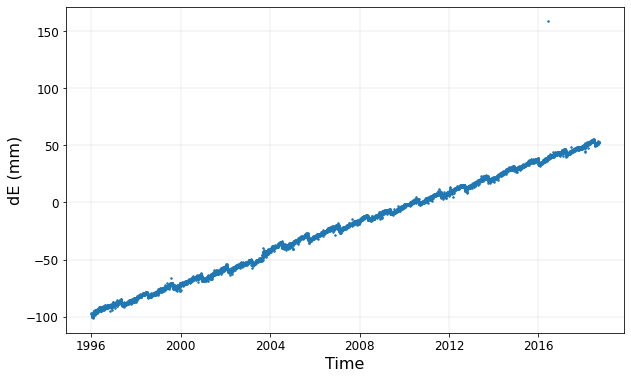

In [4]:
### Quick plot of the data

# plot setup
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(labelsize=12)

# plot results
ax.plot(data["dates"],data["dE"]*1000,".",ms=3)

# formatting
ax.tick_params(labelsize=12)
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("dE (mm)",fontsize=16)
ax.grid(lw=0.2)

# show
plt.show()
plt.close()

---

Keep in mind, these positions are relative to stable North America. During the normal "interseismic" period, the megathrust is locked and the coastal GPS stations are moving eastward in a relative sense. This is more or less what we see. Slip on the subduction interface would shoot this station westward.

As you can see, the station is moving to the East in a more or less linear fashion (except for the outlier data point!). If you look closely, however, you may notice a bit of a departuer from this linear trend.

To see this, let's take a closer look at a shorter time period:

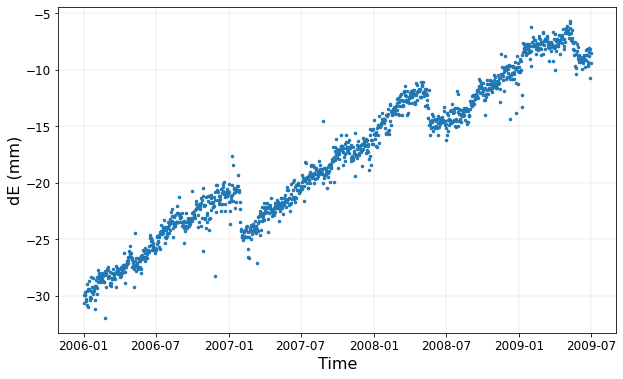

In [5]:
### Zoom in a bit

# zoom range
tstart = pd.to_datetime("2006-01-01")
tend = pd.to_datetime("2009-07-01")
iplot = (data["dates"]>=tstart)&(data["dates"]<=tend)

# plot setup
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(labelsize=12)

# plot results
ax.plot(data.loc[iplot,"dates"],
        data.loc[iplot,"dE"]*1000,".",ms=5)

# formatting
ax.tick_params(labelsize=12)
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("dE (mm)",fontsize=16)
ax.grid(lw=0.2)

# show
plt.show()
plt.close() 

---

Bingo. If we zoom in, we can see beyond this sawtooth pattern beyond the linear trend. These are quasi-period slow slip events, which move the GPS station back in the plate convergence direction. Note that each data point is a daily position, so the duration of these events is actually non-trivial, of order weeks. Events of this type occur about every 18 months or so in Cascadia, although not with perfect regularity.

Of course, this is only one station. Let's see what else we've got!

In [6]:
### Load and process many stations

# list of stations
stations = ["ALBH","CHWK","DRAO","HOLB","NANO",
           "NEAH","PABH","PGC5","SEAT","SEDR","UCLU","WILL"]

# store information in a dictionary
gdata = {}

# loop over stations
for sta in stations:
    
    # load data
    data = pd.read_csv("data/gps/{:}.pbo.{:}.pos".format(sta,ref),
                  sep="\s+",index_col=None,skiprows=nskip,
                      usecols=["*YYYYMMDD","HHMMSS","dN","dE","dU"])
    
    # compute dates
    datestr = data["*YYYYMMDD"].astype("str") # day as string
    datestr += data["HHMMSS"].astype("str") # time as tring
    data["dates"] = pd.to_datetime( # to datetime
        [ss[0:4]+"-"+ss[4:6]+"-"+ss[6:8]+" "+ss[
        8:10]+":"+ss[10:12]+":"+ss[12:14]  for ss in datestr])

    # reformat
    keepcols = ["dates","dN","dE","dU"]
    data = data[keepcols]
    
    # add to dataset
    gdata[sta] = data
    print("Done with",sta)

Done with ALBH
Done with CHWK
Done with DRAO
Done with HOLB
Done with NANO
Done with NEAH
Done with PABH
Done with PGC5
Done with SEAT
Done with SEDR
Done with UCLU
Done with WILL


0 0 0 ALBH
1 0 1 CHWK
2 1 0 DRAO
3 1 1 HOLB
4 2 0 NANO
5 2 1 NEAH
6 3 0 PABH
7 3 1 PGC5
8 4 0 SEAT
9 4 1 SEDR
10 5 0 UCLU
11 5 1 WILL


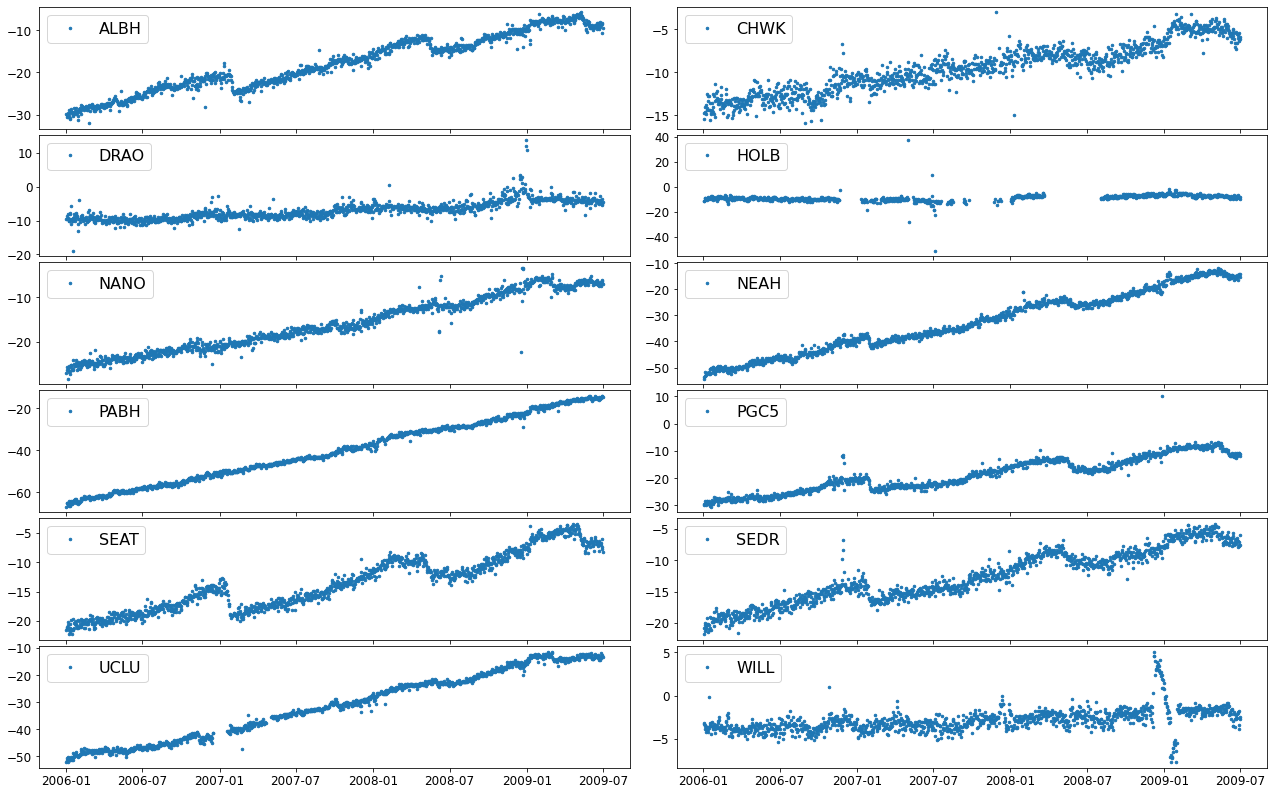

In [7]:
### Plot data

# plot this zoom range
tstart = pd.to_datetime("2006-01-01")
tend = pd.to_datetime("2009-07-01")

# figure setup
fig, axi = plt.subplots(6,2,figsize=(22,14),sharex="all")
fig.subplots_adjust(wspace=0.08,hspace=0.05)

# loop over stations
ii, jj = 0, -1
for kk, station in enumerate(stations):
    
    # select axis
    jj = np.mod(kk,2)
    ii = int((kk-jj)/2)
    print(kk, ii, jj, station)
    ax = axi[ii,jj]
    
    # select data
    data = gdata[station]
    iplot = (data["dates"]>=tstart)&(data["dates"]<=tend)
    
    # plot results
    ax.plot(data.loc[iplot,"dates"],data.loc[iplot,"dE"]*1000,
        ".",ms=5,label=station)
    
    # formatting
    ax.legend(loc="upper left",fontsize=16)
    ax.tick_params(labelsize=12)
    
# show final plot
plt.show()
plt.close()

---

We can see the slow-slip signal show up on some but not all of the stations. This comes down to the relative location between the slip events and the stations. Stations like ALBH, PGC5, SEAT, and SEDR are well-positioned. HOLB, NEAH, UCLU are actually a bit too far north and/or west to capture it properly. NANO, CHWK, and especially DRAO and WILL are too far inland. As a reminder, this is our station geometry:

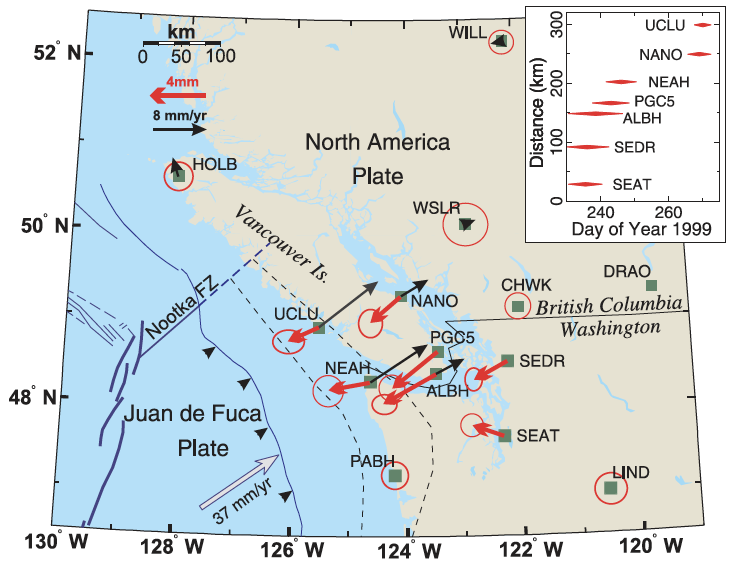

---

A few questions before we wrap up this example:
 
**Question 1**:

Here, we looked at the E displacement. What would have happened if we looked at the N displacement? What about the U displacement? What could we have done to accentuate the signal?
 
**Question 2**:

Here, we focused on only a handful of slip events. If we had looked at a different point in time, would the "good" stations remain the same?

**Question 3**:

You may have noticed that these GPS position time series are rather noisy. Any idea why that may be? And what does that imply for our data processing workflow?

## Example 2: Parkfield, CA

While we noted above the traditional waveform seismology is often of little use in studying slow earthquakes, that is not uniformly true. One important exception is in the study of Low Frequency Earthquakes (LFEs) and tremor. The Parkfield section of the San Andreas Fault is reknown for hosting a variety of earthquake-adjacent phenomena, from large (M~6) dynamic rupture down to tiny LFEs. Building on previous work by his team and many others, Shelly (2017) used a sophisticated waveform template based approach to compile a detailed catalog of LFEs near Parkfield. This work depends in large part on the extremely high quality HRSN operated by UC Berkeley.

As a sort of complement to our analysis above, we will dive into this dataset in the second example.

---

In map view and cross section, the dataset looks like this (Shelly 2017): 

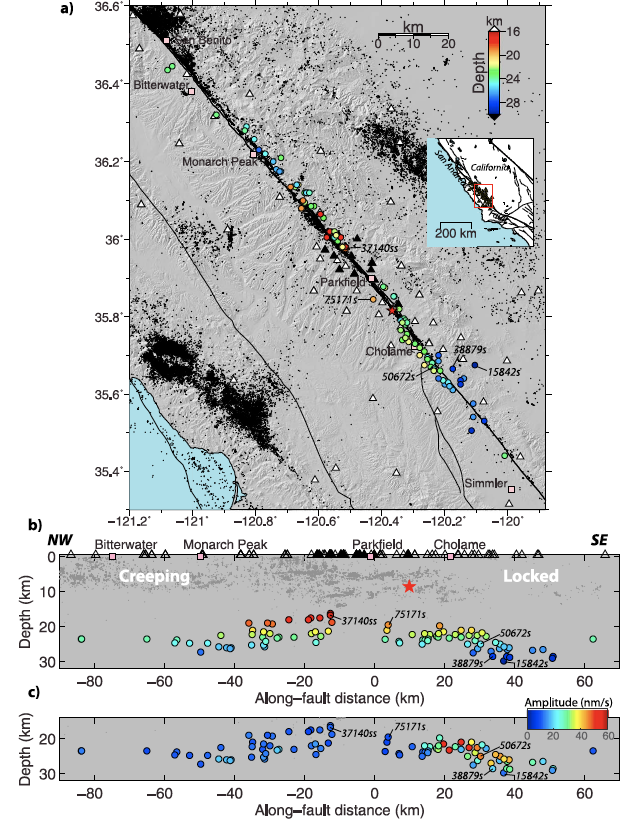

You can see that in map view, the LFEs are localized more or less along the main trace of the San Andreas Fault (SAF). In cross section is where things get interesting. In particular, take a closer look at the depth of these events. At 16-32km, they are beneath the classical seismogenic zone (down to ~15km) of strike-slip plate boundaries like the SAF. Above the LFEs, we see a pretty active set of "fast" earthquakes, including the most recent M6 in 2004. There is actually an interesting gap between two major cluster of LFEs in the north and south. Note that to the north of Parkfield, the SAF itself is effectively creeping. One of the outstanding questions in earthquake hazards in California is whether a large event on the SAF would actually be able to penetrate and rupture through this creeping section. So understanding the fault mechanics of this region is of fundamental importance. 

---

To dig into this dataset further, we will of course need to load it into memory. 

In [8]:
### Load data

# load data
lfe_df = pd.read_csv("data/shelly-parkfield.txt",
                    sep="\s+",skiprows=1,index_col=None)
lfe_df

,year,month,day,s_of_day,hour,minute,second,ccsum,meancc,med_cc,seqday,ID,latitude,longitude,depth,n_chan
0,2001,4,6,43019.35,11,56,59.35,4.57,0.381,0.456,37,58459s,35.620,-120.185,25.75,12
1,2001,4,9,81061.60,22,31,1.60,4.96,0.413,0.475,40,33861s,35.530,-120.075,28.50,12
2,2001,4,30,75880.85,21,4,40.85,4.25,0.354,0.436,61,32192s,35.700,-120.280,21.00,12
3,2001,5,2,73935.25,20,32,15.25,5.25,0.437,0.479,63,58459s,35.620,-120.185,25.75,12
4,2001,5,3,31919.00,8,51,59.00,4.09,0.341,0.390,64,32192s,35.700,-120.280,21.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045622,2016,9,19,80307.20,22,18,27.20,8.47,0.314,0.359,5682,15842s,35.675,-120.105,29.75,27
1045623,2016,9,19,80352.00,22,19,12.00,10.70,0.396,0.416,5682,15842s,35.675,-120.105,29.75,27
1045624,2016,9,19,82054.65,22,47,34.65,5.16,0.191,0.191,5682,47927s,35.875,-120.390,21.00,27
1045625,2016,9,19,82916.50,23,1,56.50,5.17,0.192,0.190,5682,47927s,35.875,-120.390,21.00,27


---

Wowza, more than 1 million events recorded over this ~ 16.5 year time period!

It turns out that the LFEs at Parkfield belong to 88 individual "families" with highly similar waveforms. The idea (although not definitively demonstrated) is that each family corresponds to an asperity or "strong" fault patch that is repeatedly loaded by slow slip. Thus, while much of the slip at this depth is likely aseismic, the rupture of these asperities produces radiated energy in the form of LFEs.

We can examine the individual LFEs using `pandas` `groupby` feature. For example, here's how we make a histogram of the family depths:

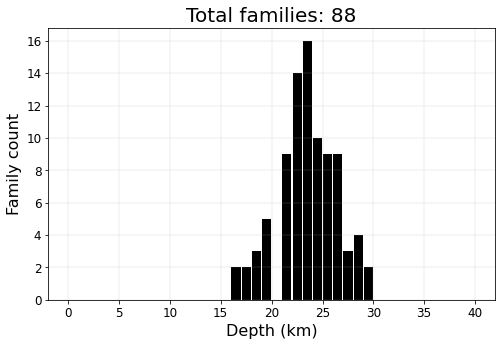

In [9]:
### Groupby example

# loop over families, track counts and depths
counts, depths = [], []
for g, v in lfe_df.groupby("ID"):
    counts.append(len(v))
    depths.append(v["depth"].values[0])

# histogram of depths
fig, axi = plt.subplots(figsize=(8,5))
bins = np.linspace(0,40,41)
axi.hist(depths,bins,rwidth=0.9,color="k")

# formatting
axi.set_xlabel("Depth (km)",fontsize=16)
axi.set_ylabel("Family count",fontsize=16)
axi.set_title("Total families: %d" %len(depths), fontsize=20)
axi.tick_params(labelsize=12)
axi.grid(lw=0.2)
plt.show()


---

One interesting thing to do is plot the cumulative event counts of individual families. To do this, we first need to wrangle our DataFrame a bit to compute dates. This is quite straightforward in Pandas.

In [10]:
### compute dates

# using pandas, compute dates
lfe_df["date"] = pd.to_datetime(
     lfe_df[["year","month","day","hour","minute","second"]])

# keep only one date related field
newcols = ["date","ccsum","meancc","med_cc","ID",
          "latitude","longitude","depth","n_chan"]
lfe_df = lfe_df[newcols]

# show this
lfe_df

,date,ccsum,meancc,med_cc,ID,latitude,longitude,depth,n_chan
0,2001-04-06 11:56:59.350,4.57,0.381,0.456,58459s,35.620,-120.185,25.75,12
1,2001-04-09 22:31:01.600,4.96,0.413,0.475,33861s,35.530,-120.075,28.50,12
2,2001-04-30 21:04:40.850,4.25,0.354,0.436,32192s,35.700,-120.280,21.00,12
3,2001-05-02 20:32:15.250,5.25,0.437,0.479,58459s,35.620,-120.185,25.75,12
4,2001-05-03 08:51:59.000,4.09,0.341,0.390,32192s,35.700,-120.280,21.00,12
...,...,...,...,...,...,...,...,...,...
1045622,2016-09-19 22:18:27.200,8.47,0.314,0.359,15842s,35.675,-120.105,29.75,27
1045623,2016-09-19 22:19:12.000,10.70,0.396,0.416,15842s,35.675,-120.105,29.75,27
1045624,2016-09-19 22:47:34.650,5.16,0.191,0.191,47927s,35.875,-120.390,21.00,27
1045625,2016-09-19 23:01:56.500,5.17,0.192,0.190,47927s,35.875,-120.390,21.00,27


---

Ok, now let's start taking a look at individual families, for example "75171s" (don't ask me where the names come from).


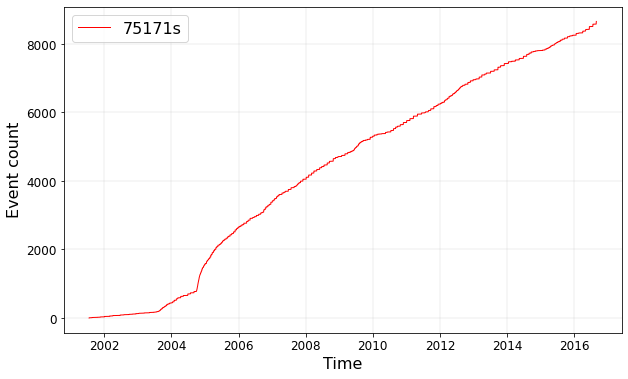

In [11]:
### Cumulative event count

# select family
famID = "75171s"
ix = lfe_df["ID"]==famID

# select times
tt1 = lfe_df.loc[ix,"date"]

# cumulative count
nn1 = np.arange(ix.sum())

# figure setup
fig, ax = plt.subplots(figsize=(10,6))

# plot cumulative events
ax.plot(tt1,nn1,'-r',lw=1.0,label="75171s")

# format plot
ax.set_xlabel("Time",fontsize=16)
ax.set_ylabel("Event count",fontsize=16)
ax.tick_params(labelsize=12)
ax.grid(lw=0.2)
ax.legend(loc="upper left",fontsize=16)

# show
plt.show()
plt.close()



--- 

Interesting! There are a few things to note here:

* Before late-2003, the network was pretty noisy and didn't record much. By 2004, network upgrades really improved detection capability

* What happened in 2004? The Parkfield M6 earthquake! This caused a rapid acceleration in LFE activity following the mainshock.

* The logarithmic form of this acceleration is exactly what we might expect from a postseismic afterslip driver.

* LFE rates are pretty steady from 2006 onward. A more or less continuous steady stream of events.

Let's compare this to another family ("37140ss"):

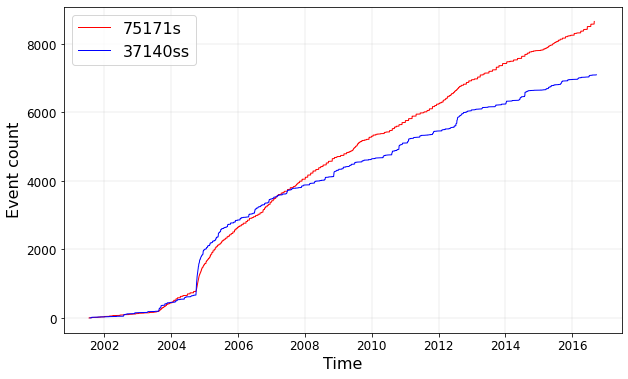

In [12]:
### Cumulative event count

# select family
famID = "37140ss"
ix = lfe_df["ID"]==famID

# select times
tt2 = lfe_df.loc[ix,"date"]

# cumulative count
nn2 = np.arange(ix.sum())

# figure setup
fig, ax = plt.subplots(figsize=(10,6))

# plot cumulative events
ax.plot(tt1,nn1,'-r',lw=1.0,label="75171s")
ax.plot(tt2,nn2,'-b',lw=1.0,label="37140ss")

# format plot
ax.set_xlabel("Time",fontsize=16)
ax.set_ylabel("Event count",fontsize=16)
ax.tick_params(labelsize=12)
ax.grid(lw=0.2)
ax.legend(loc="upper left",fontsize=16)

# show
plt.show()
plt.close()


--- 

While the overall shape of these two curves is somewhat similar, there are some important differences. Most notably, the "blue" family has a "sharper" form of slip behaviors. Its 2004 postseismic transient is more abrupt and intense. And in steady state, after 2006, the time evolution is more "staircase-like" or episodic compared to the "red" family.

From a physical perspective, this implies a different frictional regime for the two families. The red family is in something of a stable, steady-sliding regime, while the blue famility is in something of an unstable, stick-slip regime.

If we normalize and shift things appropriately, we can actually display all 88 families at once:


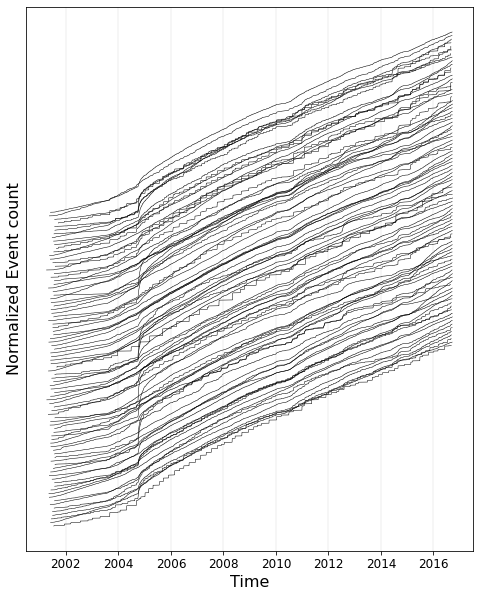

In [13]:
### Cumulative event count: All

# figure setup
fig, ax = plt.subplots(figsize=(8,10))

# loop over family
yy = 0 # starting position
for g, v in lfe_df.groupby("ID"):

    # select times
    tt = v["date"]

    # cumulative count, normalize
    nn = np.linspace(0,1,len(v))

    # plot cumulative events
    ax.plot(tt,yy+nn,'-k',lw=0.5)
    yy+=0.02 # update starting position

# format plot
ax.set_xlabel("Time",fontsize=16)
ax.set_ylabel("Normalized Event count",fontsize=16)
ax.tick_params(labelsize=12)
ax.grid(lw=0.2)
ax.set_yticks([])

# show
plt.show()
plt.close()

---

While not the prettiest figure, you can see that there is a wide range of slip behaviors across the 88 families. Most, if not all families see a sharp rise in event rate following the 2004 mainshock. After that, some families show more or less continuous event rates, while others are highly episodic. Ongoing work (including my own; Trugman et al. 2015) is trying to link these observations to the friction and stress state on the deep fault interface. 

# HOMEWORK

## Problem 1: Slip Behaviors Across a Subduction Zone: A Case Study

For a change of pace this final homework assignment, we are going to do a bit of "chose-your-own" adventure case study of a region of interest for you. Subduction zone plate boundaries exemplify a diverse array of slip behaviors, from large dynamic ruptures on the megathrust to shallow creep, slow slip, and deep earthquakes. 

For this problem, pick a subduction zone of your choice, and do a bit of digging to learn about the full spectrum of slip phenomena you see there . This doesn't need to be a full scale review article or anything like that, but just a few paragraphs (~3 or so) touching on the following points:

* "Fast" earthquakes. Do large and damaging ones occur regularly? Any recent or notable examples? Is there anything particularly interesting about the megathrust slip behaviors that we should be aware of?

* "Slow" earthquakes. Do we see shallow or deep slow slip or fault creep? Both? Neither? Is it accompanied by tremor?

* "Deep" earthquakes. Are there cases of intermediate or deep focus earthquakes? Any speculation about the physical mechanisms underlying them?

Feel free to include some representative figures if you like, and definitely cite your sources!

Since I realize this is a bit of an extensive and multi-faceted assignment, this is the only problem in this notebook.

In [14]:
# [Your answer here, about 3 paragraphs should be good enough]